## TOC:
* [Finite fields](#finite-fields)
    * [Finite element](#finite-element)
    * [Addition && Subtraction](#field-add-sub)
    * [Multiplication && Exponentiation](#field-mul-expo)
    * [Division](#division)
* [Elliptic cuve](#ec)
    * [Intro](#ec-intro)
    * [EC Point](#ec-point)
    * [EC Addition](#ec-addition)


# Finite fields<a class="anchor" id="finite-fields"></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

## Finite element <a class="anchor" id="finite-element"></a>

In [3]:
class FieldElement:

    def __init__(self, num, prime):
        if num >= prime or num < 0:
            error = 'Num {} not in field range 0 to {}'.format(num, prime - 1)
            raise ValueError(error)
        self.num = num 
        self.prime = prime

    def __repr__(self):
        return 'FieldElement_{}({})'.format(self.prime, self.num)

    def __eq__(self, other):
        if other is None:
            return False
        return self.num == other.num and self.prime == other.prime

    def __ne__(self, other):
        if other is None:
            return False
        return self.num != other.num or self.prime != other.prime


if __name__ == '__main__':
    a = FieldElement(7, 13)
    b = FieldElement(6, 13)
    print(a == b)
    print(a == a)
    print(a != a)
    print(a != b)

False
True
False
True


## Adition && Subtraction<a class="anchor" id="field-add-sub"></a>

In [4]:

def __add__(self, other):
    if self.prime != other.prime:
        raise TypeError('Cannot add two numbers in different Fields')
    num = (self.num + other.num) % self.prime
    return self.__class__(num, self.prime)


def __sub__(self, other):
    if self.prime != other.prime:
        raise TypeError('Cannot subtract two numbers in different Fields')
    num = (self.num - other.num) % self.prime
    return self.__class__(num, self.prime)

setattr(FieldElement, '__add__', __add__)
setattr(FieldElement, '__sub__', __sub__)

if __name__ == '__main__':
    print(a+b)
    print(a-b)


FieldElement_13(0)
FieldElement_13(1)


## Multiplication && Exponentiation <a class="anchor" id="field-mul-expo"></a>

In [5]:
def __mul__(self, other):
    if self.prime != other.prime:
        raise TypeError('Cannot multiply two numbers in different Fields')
    num = (self.num * other.num) % self.prime
    return self.__class__(num, self.prime)

def __pow__(self, exponent):
    n = exponent % (self.prime - 1)
    num = pow(self.num, n, self.prime)
    return self.__class__(num, self.prime)

setattr(FieldElement, '__mul__', __mul__)
setattr(FieldElement, '__pow__', __pow__)


if __name__ == '__main__':
    a = FieldElement(3, 13)
    b = FieldElement(12, 13)
    c = FieldElement(10, 13)
    print(a*b==c)
    print(a**4)

    a = FieldElement(7, 13)
    b = FieldElement(8, 13)
    print(a**-3==b)


True
FieldElement_13(3)
True


## Division <a class="anchor" id="division"></a>

In [6]:
def __truediv__(self, other):
    if self.prime != other.prime:
        raise TypeError('Cannot divide two numbers in different Fields')
    num = self.num * pow(other.num, self.prime - 2, self.prime) % self.prime
    return self.__class__(num, self.prime)

setattr(FieldElement, '__truediv__', __truediv__)

if __name__ == '__main__':
    a = FieldElement(7, 13)
    b = FieldElement(8, 13)
    print(a/b)

FieldElement_13(9)


# Elliptic Curve<a class="anchor" id="ec"></a>

## Intro<a class="anchor" id="ec-intro"></a>

Eliptic curves are deffined by:
$y^2 = x^3 + ax + b$

In case of bitcoin we use:
$y^2 = x^3 + 7$

Where $a=0$ and $b=7$

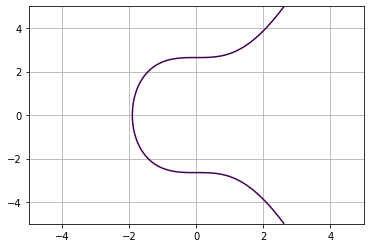

In [7]:
def plot_curve(a, b):
    y, x = np.ogrid[-5:5:100j, -5:5:100j]
    plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a - b, [0])
    plt.grid()
    plt.show()

if __name__ == '__main__':
    plot_curve(0, 7)

## EC Point<a class="anchor" id="ec-point"></a>

In [8]:
class Point:

    def __init__(self, x, y, a, b):
        self.a = a
        self.b = b
        self.x = x
        self.y = y
        if self.y**2 != self.x**3 + a * x + b:
            raise ValueError('({}, {}) is not on the curve'.format(x, y))

    def __repr__(self):
        return 'EC_(A={}, B={})_point({})'.format(self.a, self.b ,(self.x, self.y ))

    def __eq__(self, other):
        return self.x == other.x & self.y == other.y & self.a == other.a & self.b == other.b
    
    def __ne__(self, other):
        return not (self == other)


if __name__ == '__main__':
    p1 = Point(-1, -1, 5, 7)
    p2 = Point(18, 77, 5, 7)
    print(p1 == p2)

False


## EC Addition<a class="anchor" id="ec-addition"></a>

In [9]:

def inf_val_init(self, x, y, a, b):
    self.a = a
    self.b = b
    self.x = x
    self.y = y
    if self.x is None and self.y is None:
        return
    if self.y**2 != self.x**3 + a * x + b:
        raise ValueError('({}, {}) is not on the curve'.format(x, y))


def __add__(self, other):
    if self.a != other.a or self.b != other.b:
        raise TypeError('Points {}, {} are not on the same curve'.format(self, other))
    if self.x is None:
        return other
    if other.x is None:
        return self
    if self.x == other.y and self.y != other.y:
        return self.__class__(None, None, self.a, self.b)
    if self.x != other.x:
        s = (other.y - self.y) / (other.x - self.x)
        x = s**2 - self.x - other.x
        y = s * (self.x - x) - self.y
        return self.__class__(x, y, self.a, self.b)
    if self == other:
        s = (3 * self.x**2 + self.a) / (2 * self.y)
        x = s**2 - 2 * self.x
        y = s * (self.x - x) - self.y
        return self.__class__(x, y, self.a, self.b)
    if self == other and self.y == 0 * self.x:
	    return self.__class__(None, None, self.a, self.b)

setattr(Point, '__init__', inf_val_init)

setattr(Point, '__add__', __add__)



if __name__ == '__main__':
    p1 = Point(-1, -1, 5, 7)
    p2 = Point(-1, -1, 5, 7)
    inf = Point(None, None, 5, 7)
    print(p1 + inf)
    print(inf + p2)
    print(p1 + p2)

EC_(A=5, B=7)_point((-1, -1))
EC_(A=5, B=7)_point((-1, -1))
None
